# Ednei Cunha Vicente - Cientista de Dados

![title](imagem/projeto.png)

# Definição do Projeto

O que é um Sistema de Recomendação de Medicamentos?
Um sistema de recomendação de medicamentos é uma ferramenta tecnológica que 
utiliza algoritmos de aprendizado de máquina para sugerir medicamentos aos 
pacientes, médicos ou farmacêuticos, com base em dados históricos, 
características do paciente (idade, histórico médico, alergias, etc.) e 
informações sobre os medicamentos (efeitos colaterais, interações 
medicamentosas, etc.).

Em resumo, é um sistema inteligente que busca encontrar a melhor opção de 
tratamento para cada indivíduo, de forma personalizada e eficiente.
![title](imagem/images.jpeg)

# Dados
Este conjunto de dados é um recurso valioso para profissionais de saúde, cientistas de dados e entusiastas interessados ​​em explorar o mundo dos medicamentos e produtos de saúde. Ele contém um rico repositório de informações extraídas da 1mg, uma popular plataforma de farmácia e saúde online, cobrindo mais de 11.000 medicamentos.

https://www.kaggle.com/datasets/singhnavjot2062001/11000-medicine-details

In [1]:
#import
#manipulação e visualização
import pandas as pd
import numpy as np
import seaborn as sns
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from nltk.stem.porter import PorterStemmer
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import matplotlib as m
plt.style.use('fivethirtyeight')

In [2]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Ednei Cunha Vicente" --iversions

Author: Ednei Cunha Vicente

seaborn   : 0.12.2
nltk      : 3.6.5
plotly    : 5.15.0
numpy     : 1.20.3
sklearn   : 0.0
matplotlib: 3.4.2
pandas    : 1.2.2



In [3]:
df = pd.read_csv("dados/Medicine_Details.csv")

## Análise Exploratória

O conjunto de dados consiste nas seguintes colunas:

- **Medicine Name** : O nome do medicamento.

- **Composition** : A composição química do medicamento.

- **Uses** : As várias condições médicas para as quais o medicamento é usado.

- **Side_effects** : Os potenciais efeitos colaterais do medicamento.

- **Image URL** : Uma URL para uma imagem do medicamento.

- **Manufacturer** : A empresa que fabrica o medicamento.

- **Excellent Review %** : A porcentagem de avaliações excelentes que o medicamento recebeu.

- **Average Review %**: A porcentagem de avaliações médias que o medicamento recebeu.

- **Poor Review %** : A porcentagem de avaliações ruins que o medicamento recebeu.

- **Etapa 1: Análise Exploratória**

Esta etapa consiste em explorar o conjunto de dados de medicamentos para responder a diversas perguntas-chave. O objetivo é obter uma compreensão profunda da composição e características dos medicamentos presentes no conjunto de dados. As perguntas a serem respondidas são:

- **Quantidade de medicamentos e fabricantes:** Quantos medicamentos distintos existem no conjunto de dados? Quantos fabricantes diferentes estão representados?
- **Ranking de fabricantes:** Quais fabricantes lideram o ranking de fabricação de medicamentos, ou seja, quais produzem a maior quantidade de medicamentos diferentes?
- **Condições médicas mais frequentes:** Quais condições médicas são mais frequentemente tratadas pelos medicamentos presentes no conjunto de dados?
- **Componentes mais frequentes:** Quais componentes (princípios ativos) são mais frequentes nos medicamentos?
- **Medicamentos com melhores avaliações positivas:** Quais medicamentos receberam as melhores avaliações positivas dos usuários?
- **Medicamentos com piores avaliações negativas:** Quais medicamentos receberam as piores avaliações negativas dos usuários?
- **Etapa 2:** 
- **Criação de um Sistema de Recomendação de Medicamentos**

- **Após a análise exploratória, a segunda etapa consiste em desenvolver um sistema de recomendação de medicamentos. Este sistema deverá ser capaz de recomendar medicamentos aos usuários com base em seus critérios e necessidades.**

In [4]:
df.head()

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
0,Avastin 400mg Injection,Bevacizumab (400mg),Cancer of colon and rectum Non-small cell lun...,Rectal bleeding Taste change Headache Noseblee...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22
1,Augmentin 625 Duo Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),Treatment of Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glaxo SmithKline Pharmaceuticals Ltd,47,35,18
2,Azithral 500 Tablet,Azithromycin (500mg),Treatment of Bacterial infections,Nausea Abdominal pain Diarrhea,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alembic Pharmaceuticals Ltd,39,40,21
3,Ascoril LS Syrup,Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...,Treatment of Cough with mucus,Nausea Vomiting Diarrhea Upset stomach Stomach...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glenmark Pharmaceuticals Ltd,24,41,35
4,Aciloc 150 Tablet,Ranitidine (150mg),Treatment of Gastroesophageal reflux disease (...,Headache Diarrhea Gastrointestinal disturbance,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Cadila Pharmaceuticals Ltd,34,37,29


In [5]:
#contagem dos registros
df.shape

(11825, 9)

In [6]:
#verificando valores nulos
df.isnull().sum()

Medicine Name         0
Composition           0
Uses                  0
Side_effects          0
Image URL             0
Manufacturer          0
Excellent Review %    0
Average Review %      0
Poor Review %         0
dtype: int64

In [7]:
#verificando valores unicos
df.nunique()

Medicine Name         11498
Composition            3358
Uses                    712
Side_effects           1512
Image URL             11740
Manufacturer            759
Excellent Review %       85
Average Review %         79
Poor Review %            81
dtype: int64

In [8]:
#verificando valores duplicados
df.duplicated().sum()

84

In [9]:
#Excluindo valores duplicados
df = df.drop_duplicates()
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11741 entries, 0 to 11823
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Medicine Name       11741 non-null  object
 1   Composition         11741 non-null  object
 2   Uses                11741 non-null  object
 3   Side_effects        11741 non-null  object
 4   Image URL           11741 non-null  object
 5   Manufacturer        11741 non-null  object
 6   Excellent Review %  11741 non-null  int64 
 7   Average Review %    11741 non-null  int64 
 8   Poor Review %       11741 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 917.3+ KB


In [11]:
#localizando um registro aleatório
df.iloc[5]

Medicine Name                                      Allegra 120mg Tablet
Composition                                        Fexofenadine (120mg)
Uses                  Treatment of Sneezing and runny nose due to al...
Side_effects                       Headache Drowsiness Dizziness Nausea
Image URL             https://onemg.gumlet.io/l_watermark_346,w_480,...
Manufacturer                                           Sanofi India Ltd
Excellent Review %                                                   35
Average Review %                                                     42
Poor Review %                                                        23
Name: 5, dtype: object

- **Temos quantos medicamentos e fabricantes no Conjunto de Dados?**

In [12]:
total_medicamentos = len(df["Medicine Name"].unique())
total_fabricante = len(df["Manufacturer"].unique())
print(50 * '=')
print('Nosso conjunto de dados contém: ' +  str((total_medicamentos)) + " medicamentos")
print(50 * '=')
print("Nosso conjunto de dados contém: " + str((total_fabricante)) + " Fabricantes")
print(50 * '=')

Nosso conjunto de dados contém: 11498 medicamentos
Nosso conjunto de dados contém: 759 Fabricantes


- **Quais fabricantes lideram o ranking de produção de medicamentos?**

In [13]:
fabricante = df.groupby("Manufacturer").count()['Composition'].sort_values(ascending=False)[:20]

In [14]:
fabricante

Manufacturer
Sun Pharmaceutical Industries Ltd    819
Intas Pharmaceuticals Ltd            648
Cipla Ltd                            569
Torrent Pharmaceuticals Ltd          441
Lupin Ltd                            432
Mankind Pharma Ltd                   336
Zydus Cadila                         326
Alkem Laboratories Ltd               325
Macleods Pharmaceuticals Pvt Ltd     316
Abbott                               279
Micro Labs Ltd                       276
Dr Reddy's Laboratories Ltd          266
Ipca Laboratories Ltd                234
Aristo Pharmaceuticals Pvt Ltd       224
Glenmark Pharmaceuticals Ltd         208
Alembic Pharmaceuticals Ltd          166
Leeford Healthcare Ltd               162
Eris Lifesciences Ltd                136
Systopic Laboratories Pvt Ltd        131
USV Ltd                              124
Name: Composition, dtype: int64

<AxesSubplot:xlabel='Manufacturer'>

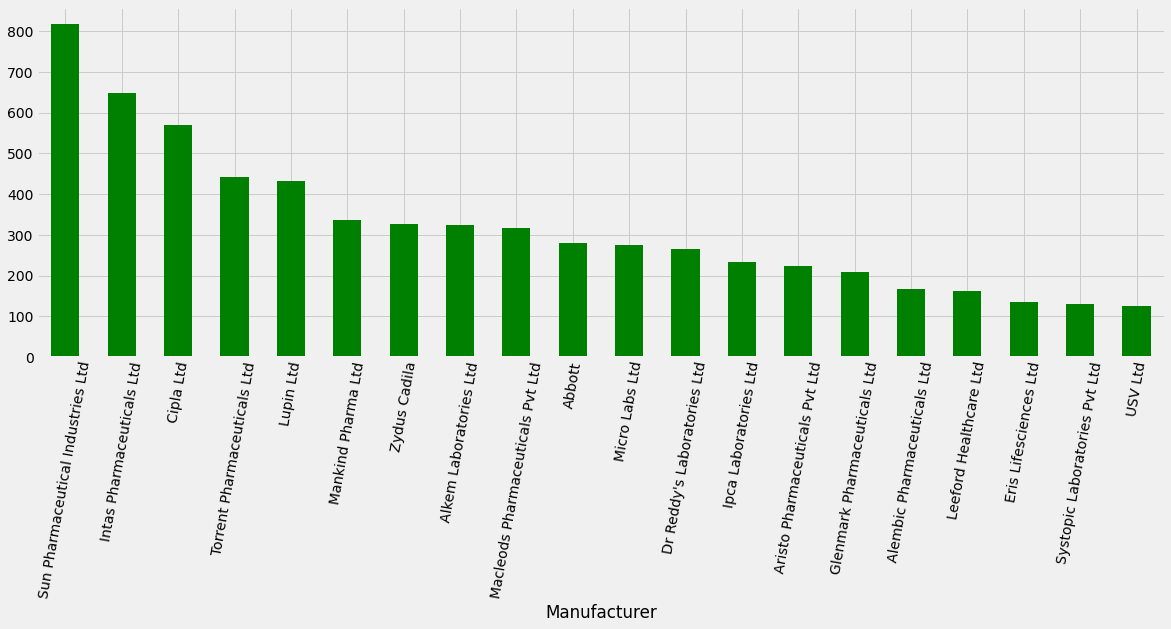

In [15]:
#plot ranking dos fabricantes 
fabricante.plot(kind='bar', figsize=(18,6), color='green', rot=80)

- **A Fabricante lider nesse conjunto de dados:**
- **É a Sun Pharmaceutical ou Sun Pharmaceutical Industries Ltd. é uma companhia farmacêutica internacional com sede em Mumbai, Índia, fundada em 1983. Produz diversos produtos farmacêuticos distribuídos nos Estados Unidos, Europa, Ásia e outras regiões do mundo.**

- **Seus produtos são de diversas áreas terapêuticas, incluindo a psiquiatria, neurologia, cardiologia, gastroenterologia, sistema respiratório e ortopedia.**

- **Quais condições médicas que mais aparecem nos medicamentos**

In [16]:
condicoes = df.groupby('Uses').count()['Medicine Name'].sort_values(ascending=False)[:20]

In [17]:
condicoes

Uses
Treatment of Type 2 diabetes mellitus                                                                               904
Treatment of Bacterial infections                                                                                   434
 Hypertension (high blood pressure)                                                                                 403
 Pain relief                                                                                                        381
Treatment of Hypertension (high blood pressure)                                                                     277
Treatment of Fungal skin infections                                                                                 216
Treatment of Neuropathic pain                                                                                       185
Treatment of Fungal infections                                                                                      179
Treatment of Gastroesophageal reflu

<AxesSubplot:xlabel='Uses'>

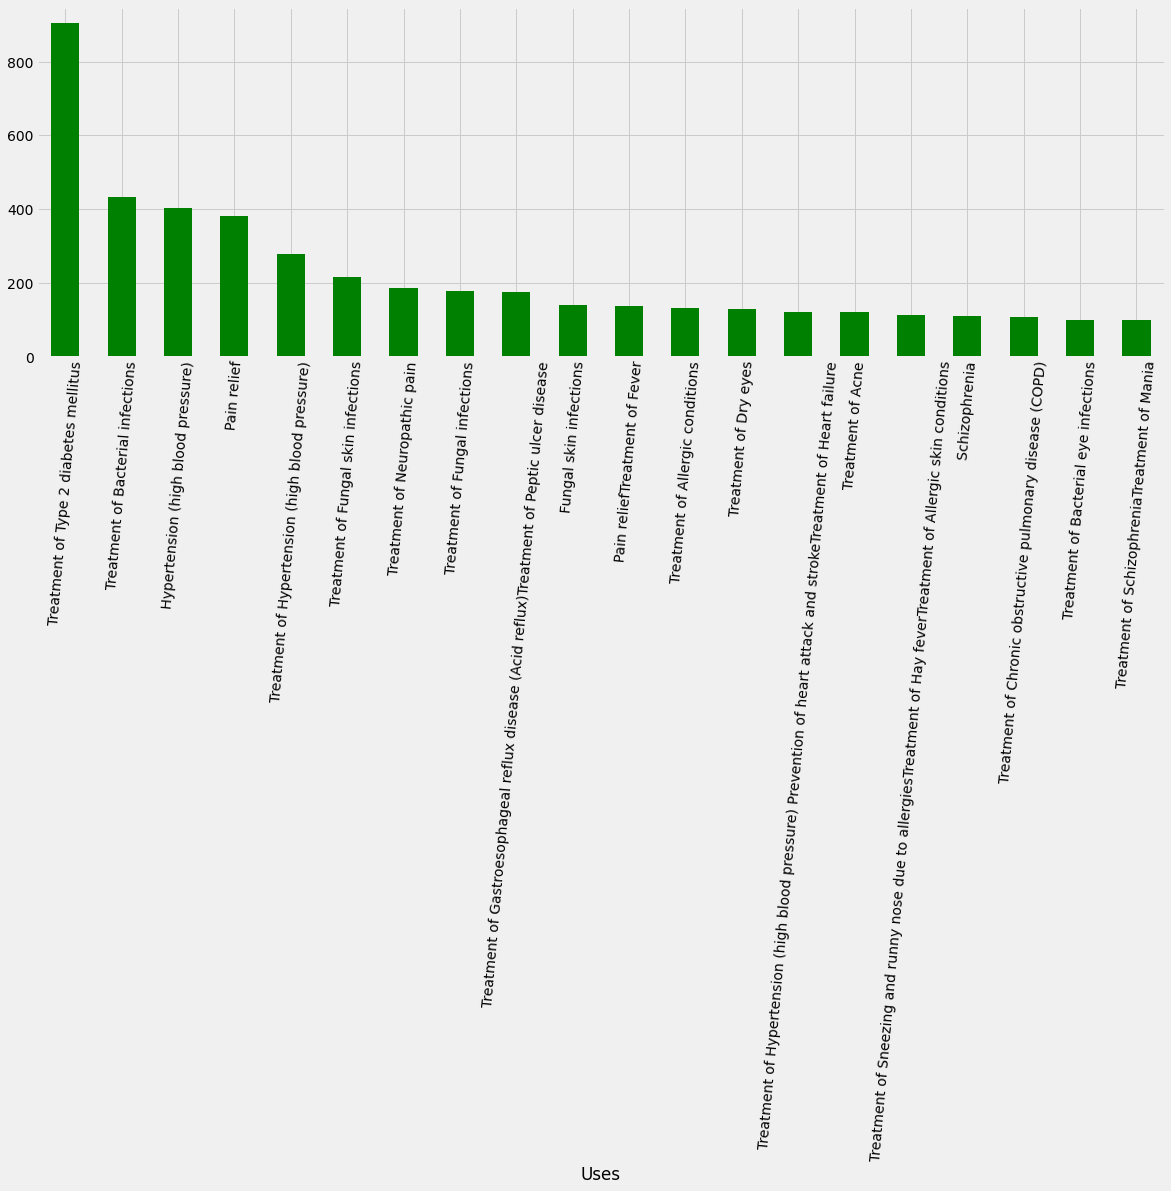

In [18]:
#plot das condições mais comuns
condicoes.plot(kind='bar',figsize=(18,6), color = 'green', rot=85)

- **Diabetes mellitus tipo 2 (DM2) é uma condição metabólica crônica caracterizada por níveis elevados de glicose no sangue (hiperglicemia).**

- **Quais são os componentes mais frequentes nos medicamentos?**

In [19]:
componentes = df.groupby("Composition").count()["Medicine Name"].sort_values(ascending=False)[:20]
componentes

Composition
Luliconazole (1% w/w)                                          98
Levocetirizine (5mg) + Montelukast (10mg)                      76
Ketoconazole (2% w/w)                                          61
Domperidone (30mg) + Rabeprazole (20mg)                        59
Itraconazole (100mg)                                           53
Telmisartan (40mg)                                             52
Itraconazole (200mg)                                           51
Domperidone (30mg) + Pantoprazole (40mg)                       47
Telmisartan (40mg) + Amlodipine (5mg)                          44
Metformin (500mg)                                              42
Minoxidil (5% w/v)                                             42
Glimepiride (2mg) + Metformin (500mg)                          42
Amoxycillin  (500mg) +  Clavulanic Acid (125mg)                40
Ketoconazole (2% w/v) + Zinc pyrithione (1% w/v)               40
Rabeprazole (20mg)                                             3

<AxesSubplot:xlabel='Composition'>

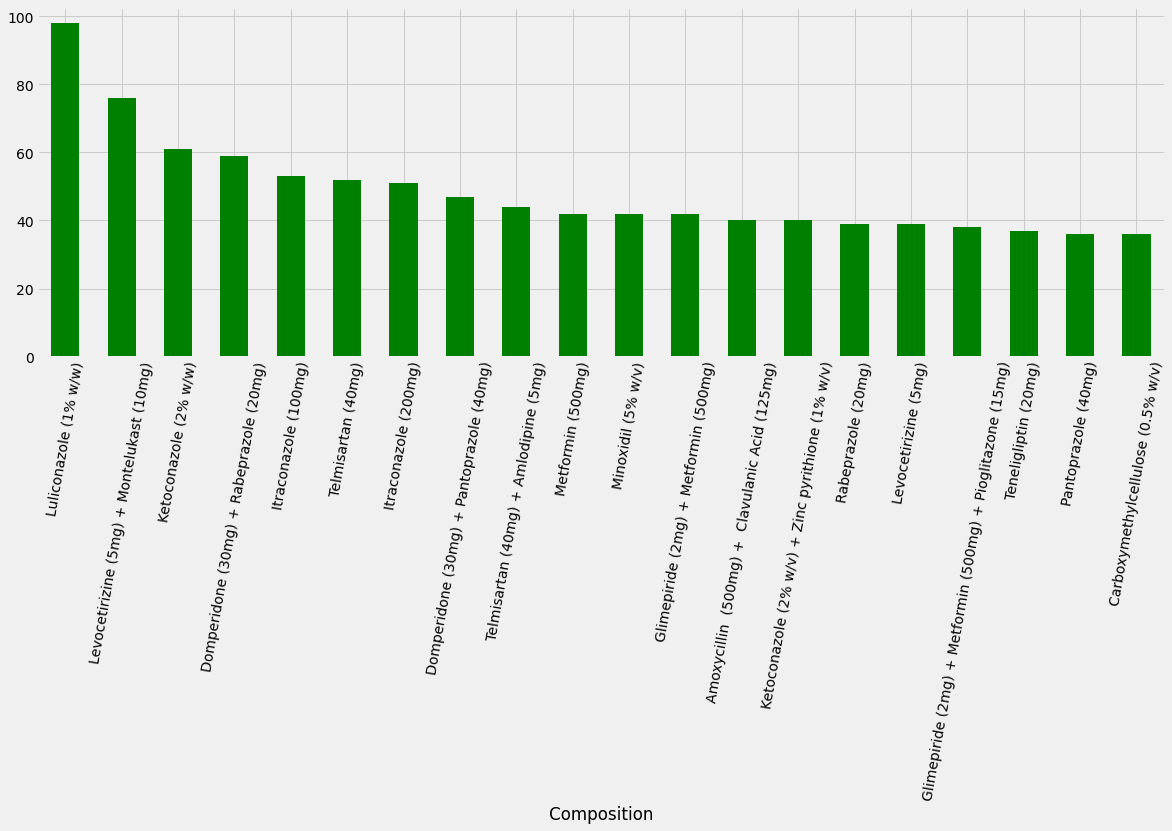

In [20]:
#plot dos componentes que mais aparecem no conjunto de dados
componentes.plot(kind='bar',figsize=(18,6), color = 'green', rot=80)

- **Luliconazol (1% w/w) é um medicamento antifúngico tópico, o que significa que é aplicado diretamente na pele. A concentração "1% w/w" indica que há 1 grama de luliconazol para cada 100 gramas do produto (ou seja, 1% em peso). Ele pertence à classe dos antifúngicos azóis e é usado para tratar infecções fúngicas da pele.**

- **Quais medicamentos tem as maiores avaliações positivas?**

In [21]:
av_positiva = df[df['Excellent Review %'] == 100].count()
total_av_positiva = len(av_positiva)
print(50 * '=')
print('\nNosso conjunto de dados contém: ' + str((av_positiva)))
print("Com avaliações positivas 100")
print(50 * '=')


Nosso conjunto de dados contém: Medicine Name         602
Composition           602
Uses                  602
Side_effects          602
Image URL             602
Manufacturer          602
Excellent Review %    602
Average Review %      602
Poor Review %         602
dtype: int64
Com avaliações positivas 100


<AxesSubplot:>

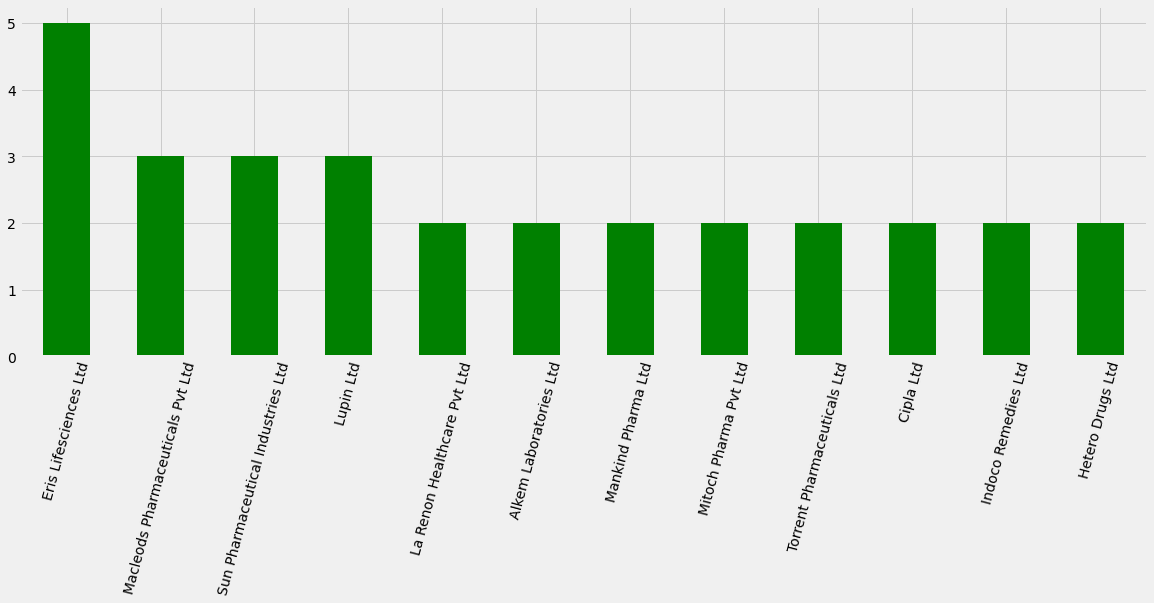

In [22]:
#plot dos fabricantes com melhores avaliações
diabete = df[df['Uses']=='Treatment of Type 2 diabetes mellitus']
diabete2 = diabete[diabete['Excellent Review %']==100]
diabete2["Manufacturer"].value_counts()[:12].plot(kind='bar', figsize=(18,6),color= 'green', rot=75)

In [23]:
#filtro Eris Lifesciences Ltd
empr_1 = diabete2[diabete2["Manufacturer"]=='Eris Lifesciences Ltd']
empr_1_a = pd.DataFrame()
empr_1_a["Fabricante"] = empr_1["Manufacturer"]
empr_1_a['Medicamento'] = empr_1["Medicine Name"]

#filtro Macleods Pharmaceuticals Pvt Ltd
empr_2 = diabete2[diabete2["Manufacturer"]=='Macleods Pharmaceuticals Pvt Ltd']
empr_2_a = pd.DataFrame()
empr_2_a["Fabricante"] = empr_2["Manufacturer"]
empr_2_a['Medicamento'] = empr_2["Medicine Name"]

#filtro Sun Pharmaceutical Industries Ltd
empr_3 = diabete2[diabete2["Manufacturer"]=='Sun Pharmaceutical Industries Ltd']
empr_3_a = pd.DataFrame()
empr_3_a["Fabricante"] = empr_3["Manufacturer"]
empr_3_a['Medicamento'] = empr_3["Medicine Name"]

#filtro Lupin
empr_4 = diabete2[diabete2["Manufacturer"]=='Lupin Ltd']
empr_4_a = pd.DataFrame()
empr_4_a["Fabricante"] = empr_4["Manufacturer"]
empr_4_a['Medicamento'] = empr_4["Medicine Name"]

In [24]:
diabete2["Manufacturer"].value_counts()[:12]

Eris Lifesciences Ltd                5
Macleods Pharmaceuticals Pvt Ltd     3
Sun Pharmaceutical Industries Ltd    3
Lupin Ltd                            3
La Renon Healthcare Pvt Ltd          2
Alkem Laboratories Ltd               2
Mankind Pharma Ltd                   2
Mitoch Pharma Pvt Ltd                2
Torrent Pharmaceuticals Ltd          2
Cipla Ltd                            2
Indoco Remedies Ltd                  2
Hetero Drugs Ltd                     2
Name: Manufacturer, dtype: int64

In [25]:
print("\nMedicamentos com avaliações 100% boas no Tratamento de diabetes mellitus tipo 2")
avaliacoes_ruim = pd.concat([empr_1_a,empr_2_a,empr_3_a,empr_4_a],axis=0)
avaliacoes_ruim


Medicamentos com avaliações 100% boas no Tratamento de diabetes mellitus tipo 2


,Fabricante,Medicamento
3067,Eris Lifesciences Ltd,Glimisave M1 Forte Tablet PR
3219,Eris Lifesciences Ltd,Glimisave M1 750 Tablet PR
3229,Eris Lifesciences Ltd,Glimisave M2 750 Tablet PR
3266,Eris Lifesciences Ltd,Glitaris 15 Tablet
11620,Eris Lifesciences Ltd,Zomelis Met 50mg/1000mg Tablet
3123,Macleods Pharmaceuticals Pvt Ltd,Geminor M 0.5 Tablet PR
10338,Macleods Pharmaceuticals Pvt Ltd,Tenginow Tablet
11064,Macleods Pharmaceuticals Pvt Ltd,Voglimac 0.3 Tablet
8106,Sun Pharmaceutical Industries Ltd,Pioglucored Forte Tablet
8696,Sun Pharmaceutical Industries Ltd,Riomet Trio 2 Tablet ER


- **Quais medicamentos tem as maiores avaliações negativas?**

In [26]:
df.head()

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
0,Avastin 400mg Injection,Bevacizumab (400mg),Cancer of colon and rectum Non-small cell lun...,Rectal bleeding Taste change Headache Noseblee...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22
1,Augmentin 625 Duo Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),Treatment of Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glaxo SmithKline Pharmaceuticals Ltd,47,35,18
2,Azithral 500 Tablet,Azithromycin (500mg),Treatment of Bacterial infections,Nausea Abdominal pain Diarrhea,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alembic Pharmaceuticals Ltd,39,40,21
3,Ascoril LS Syrup,Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...,Treatment of Cough with mucus,Nausea Vomiting Diarrhea Upset stomach Stomach...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glenmark Pharmaceuticals Ltd,24,41,35
4,Aciloc 150 Tablet,Ranitidine (150mg),Treatment of Gastroesophageal reflux disease (...,Headache Diarrhea Gastrointestinal disturbance,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Cadila Pharmaceuticals Ltd,34,37,29


In [27]:
df[df['Poor Review %']==100].count()

Medicine Name         384
Composition           384
Uses                  384
Side_effects          384
Image URL             384
Manufacturer          384
Excellent Review %    384
Average Review %      384
Poor Review %         384
dtype: int64

In [28]:
av_ruim = df[df['Poor Review %'] == 100].count()
total_av_ruim = len(av_ruim)
print(50 * '=')
print('\nNosso conjunto de dados contém: ' + str((av_ruim)))
print("Com avaliações ruins 100")
print(50 * '=')


Nosso conjunto de dados contém: Medicine Name         384
Composition           384
Uses                  384
Side_effects          384
Image URL             384
Manufacturer          384
Excellent Review %    384
Average Review %      384
Poor Review %         384
dtype: int64
Com avaliações ruins 100


In [29]:
av_ruim = df[df["Poor Review %"]==100]
av_ruim.head()

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
24,Aricep 10 Tablet,Donepezil (10mg),Alzheimer's disease,Common cold Urinary incontinence Rash Nausea D...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Eisai Pharmaceuticals India Pvt Ltd,0,0,100
308,Altonil 5 Tablet MD,Melatonin (5mg),Treatment of InsomniaTreatment of Jet lag,Headache Drowsiness,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alteus Biogenics Pvt Ltd,0,0,100
412,Avas 40 Tablet,Atorvastatin (40mg),High cholesterolPrevention of Heart attack,Dyspepsia Abdominal pain Indigestion Diarrhea ...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Micro Labs Ltd,0,0,100
483,Albutamol Neo Syrup,Etofylline (50mg) + Salbutamol (1mg),Treatment of Asthma,Nausea Vomiting Restlessness Tremors Headache ...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Centaur Pharmaceuticals Pvt Ltd,0,0,100
504,Altiva 120mg Tablet,Fexofenadine (120mg),Treatment of Sneezing and runny nose due to al...,Headache Drowsiness Dizziness Nausea,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Sun Pharmaceutical Industries Ltd,0,0,100


In [30]:
av_ruim_1 = av_ruim.groupby('Uses').count()['Medicine Name'].sort_values(ascending=False)[:20]
av_ruim_1.head()

Uses
Treatment of Type 2 diabetes mellitus                                                          38
Treatment of Bacterial infections                                                              20
 Fungal skin infections                                                                        10
 Hypertension (high blood pressure)                                                             9
Treatment of Gastroesophageal reflux disease (Acid reflux)Treatment of Peptic ulcer disease     8
Name: Medicine Name, dtype: int64

<AxesSubplot:xlabel='Uses'>

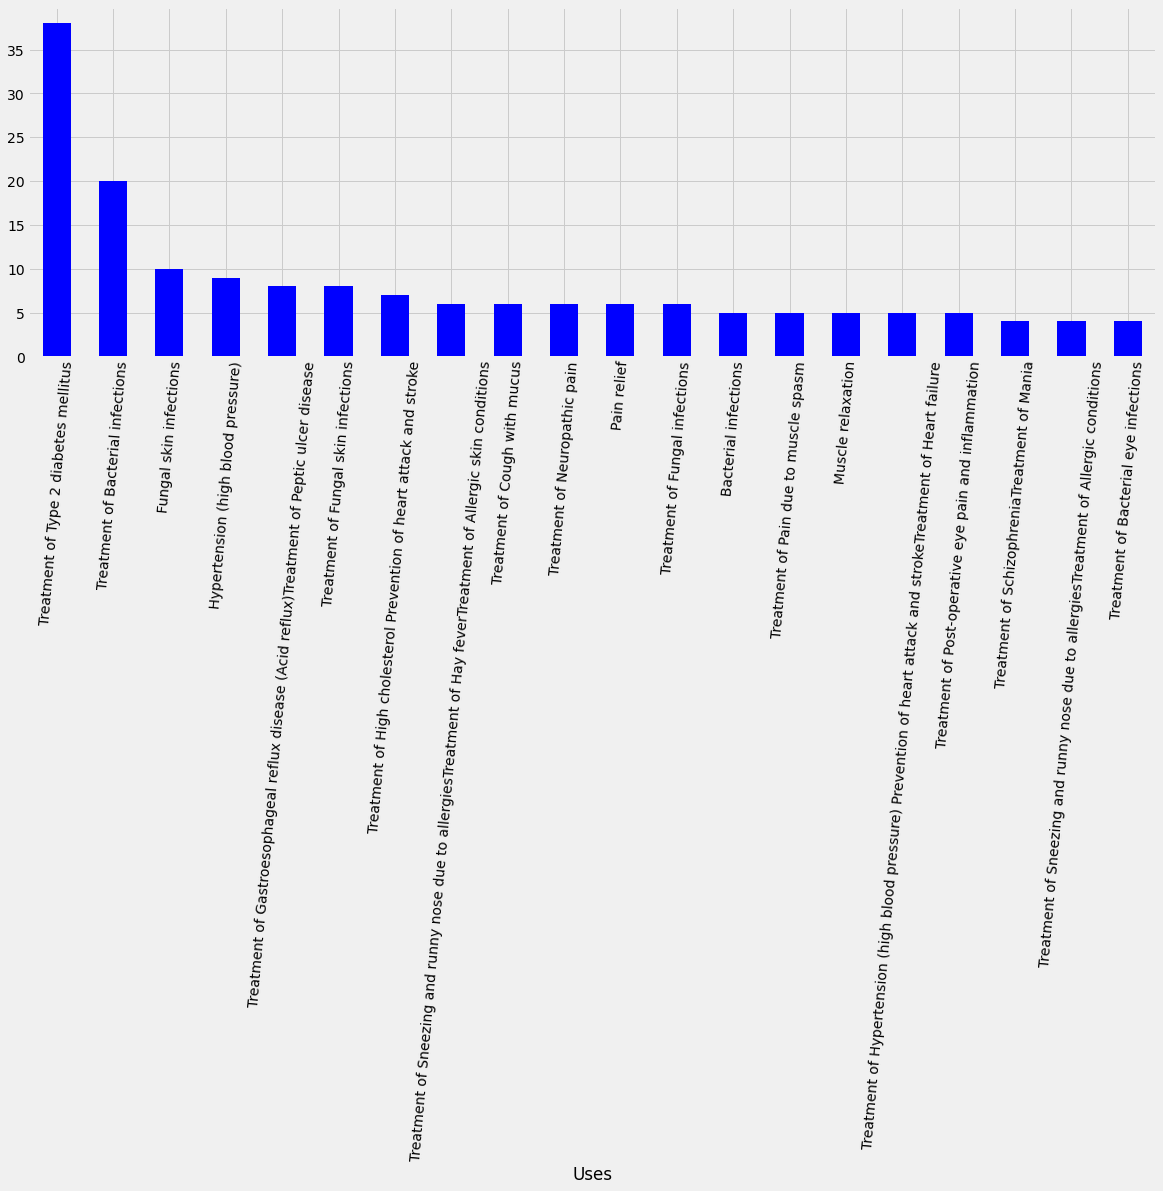

In [31]:
av_ruim_1.plot(kind='bar', figsize=(18,6),color='blue', rot=85)

<AxesSubplot:>

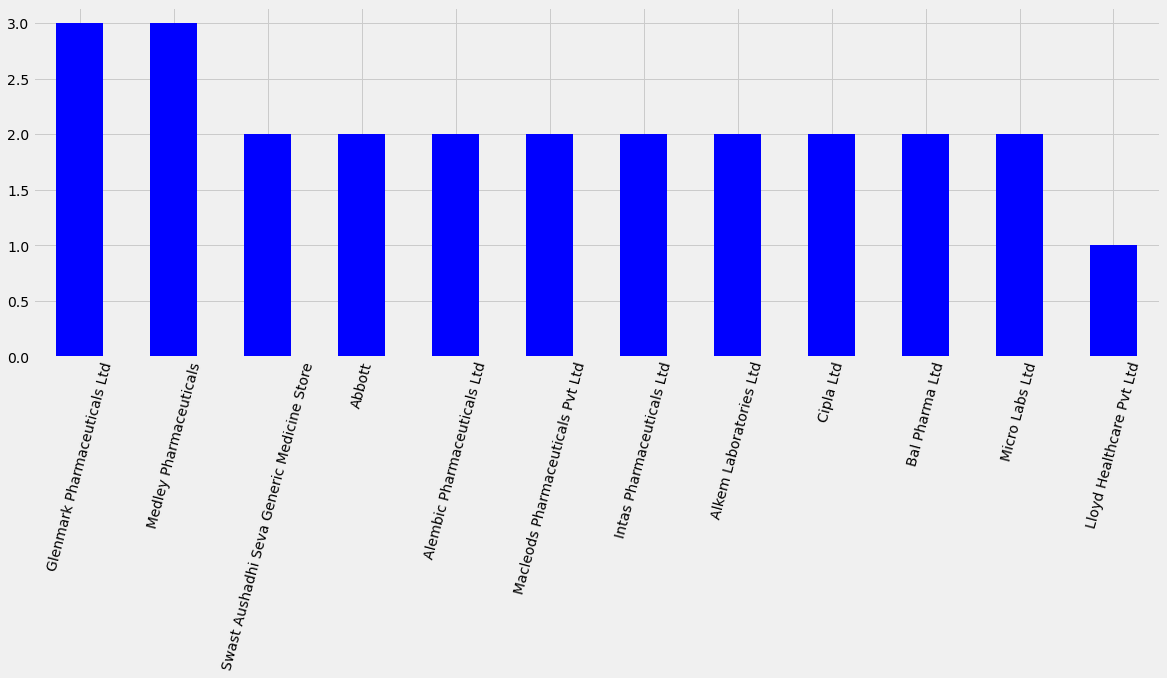

In [32]:
av_ruim_2 = df[df['Uses']=='Treatment of Type 2 diabetes mellitus']
av_ruim_3 = av_ruim_2[av_ruim_2["Poor Review %"]==100]
av_ruim_3["Manufacturer"].value_counts()[:12].plot(kind='bar',color='blue', figsize=(18,6), rot=75)

In [33]:
av_ruim_3["Manufacturer"].value_counts()[:12]

Glenmark Pharmaceuticals Ltd                  3
Medley Pharmaceuticals                        3
Swast Aushadhi Seva Generic Medicine Store    2
Abbott                                        2
Alembic Pharmaceuticals Ltd                   2
Macleods Pharmaceuticals Pvt Ltd              2
Intas Pharmaceuticals Ltd                     2
Alkem Laboratories Ltd                        2
Cipla Ltd                                     2
Bal Pharma Ltd                                2
Micro Labs Ltd                                2
Lloyd Healthcare Pvt Ltd                      1
Name: Manufacturer, dtype: int64

In [34]:
av_ruim.iloc[350]

Medicine Name                                              Urikem Syrup
Composition           Magnesium Citrate (1100mg) + Potassium Citrate...
Uses                                                       Kidney stone
Side_effects                      Diarrhea Nausea Vomiting Stomach pain
Image URL             https://onemg.gumlet.io/l_watermark_346,w_480,...
Manufacturer                                  Richfaith Pharmaceuticals
Excellent Review %                                                    0
Average Review %                                                      0
Poor Review %                                                       100
Name: 10798, dtype: object

In [35]:
#filtro Glenmark Pharmaceuticals Ltd
empr_5 = av_ruim_3[av_ruim_3["Manufacturer"]=='Glenmark Pharmaceuticals Ltd']
empr_5_a = pd.DataFrame()
empr_5_a["Fabricante"] = empr_5["Manufacturer"]
empr_5_a['Medicamento'] = empr_5["Medicine Name"]

#filtro Medley Pharmaceuticals
empr_6 = av_ruim_3[av_ruim_3["Manufacturer"]=='Medley Pharmaceuticals']
empr_6_a = pd.DataFrame()
empr_6_a["Fabricante"] = empr_6["Manufacturer"]
empr_6_a['Medicamento'] = empr_6["Medicine Name"]

#filtro Swast Aushadhi Seva Generic Medicine Store
empr_7 = av_ruim_3[av_ruim_3["Manufacturer"]=='Swast Aushadhi Seva Generic Medicine Store']
empr_7_a = pd.DataFrame()
empr_7_a["Fabricante"] = empr_7["Manufacturer"]
empr_7_a['Medicamento'] = empr_7["Medicine Name"]

#filtro Abbott
empr_8 = av_ruim_3[av_ruim_3["Manufacturer"]=='Abbott']
empr_8_a = pd.DataFrame()
empr_8_a["Fabricante"] = empr_8["Manufacturer"]
empr_8_a['Medicamento'] = empr_8["Medicine Name"]

In [36]:
print("\nMedicamentos com avaliações ruins no Tratamento de diabetes mellitus tipo 2")
avaliacoes_ruim = pd.concat([empr_5_a,empr_6_a,empr_7_a,empr_8_a],axis=0)
avaliacoes_ruim


Medicamentos com avaliações ruins no Tratamento de diabetes mellitus tipo 2


,Fabricante,Medicamento
3263,Glenmark Pharmaceuticals Ltd,Glimulin 2 Tablet
3300,Glenmark Pharmaceuticals Ltd,Glimulin MF Forte Tablet PR
3335,Glenmark Pharmaceuticals Ltd,Glinate 120 Tablet
2992,Medley Pharmaceuticals,Gepride M1 Tablet PR
3207,Medley Pharmaceuticals,Gepride M 1 Forte Tablet SR
10265,Medley Pharmaceuticals,Trigem 2 Tablet SR
3337,Swast Aushadhi Seva Generic Medicine Store,Genericart Glimepiride+Metformin Hydrochloride...
3344,Swast Aushadhi Seva Generic Medicine Store,Genericart Voglibose+Metformin Hydrochloride+G...
1068,Abbott,Abvida-M 50mg/1000mg Eazy Glide Tablet
8107,Abbott,PPG MD 0.3 Tablet


In [37]:
df["Medicine Name"].count()

11741

## Criando o Sistema de Recomendação

In [38]:
#criar uma cópia do dataframe
df_copy = df
df_copy.head()

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
0,Avastin 400mg Injection,Bevacizumab (400mg),Cancer of colon and rectum Non-small cell lun...,Rectal bleeding Taste change Headache Noseblee...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22
1,Augmentin 625 Duo Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),Treatment of Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glaxo SmithKline Pharmaceuticals Ltd,47,35,18
2,Azithral 500 Tablet,Azithromycin (500mg),Treatment of Bacterial infections,Nausea Abdominal pain Diarrhea,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alembic Pharmaceuticals Ltd,39,40,21
3,Ascoril LS Syrup,Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...,Treatment of Cough with mucus,Nausea Vomiting Diarrhea Upset stomach Stomach...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glenmark Pharmaceuticals Ltd,24,41,35
4,Aciloc 150 Tablet,Ranitidine (150mg),Treatment of Gastroesophageal reflux disease (...,Headache Diarrhea Gastrointestinal disturbance,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Cadila Pharmaceuticals Ltd,34,37,29


In [39]:
df_copy.duplicated().sum()

0

In [40]:
# funcao para remover os espacos entre palavras
def clean_text(author):
    result = str(author).lower()
    return(result.replace(' ',''))

In [41]:
#aplicando a função
df_copy['Medicine Name'] = df_copy["Medicine Name"].apply(clean_text)
df_copy['Uses'] = df_copy["Uses"].apply(clean_text)
df_copy['Composition'] = df_copy["Composition"].apply(clean_text)
df_copy['Side_effects'] = df_copy["Side_effects"].apply(clean_text)


In [42]:
#converter para letras minusculas
df_copy['Medicine Name'] = df_copy['Medicine Name'].str.lower()
df_copy['Uses'] = df_copy['Uses'].str.lower()
df_copy['Composition'] = df_copy['Composition'].str.lower()
df_copy['Side_effects'] = df_copy['Side_effects'].str.lower()

In [43]:
#função para remover sinal de +
def sinal(author):
    result = str(author).lower()
    return(result.replace('+',''))

#função para remover parenteses 
def parenteses(author):
    result = str(author).lower()
    return(result.replace('(',''))

#funcão pra remover parenteses
def clean(author):
    result = str(author).lower()
    return(result.replace(')',''))

#funcao para remover sinal /
def barra(author):
    result = str(author).lower()
    return(result.replace('/',''))

In [44]:
#aplicando as funções
df_copy['Composition'] = df_copy["Composition"].apply(sinal)
df_copy['Composition'] = df_copy["Composition"].apply(parenteses)
df_copy['Composition'] = df_copy["Composition"].apply(clean)
df_copy['Composition'] = df_copy["Composition"].apply(barra)
df_copy['Uses'] = df_copy["Uses"].apply(parenteses)
df_copy['Uses'] = df_copy["Uses"].apply(clean)

In [45]:
df_copy.head()

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
0,avastin400mginjection,bevacizumab400mg,cancerofcolonandrectumnon-smallcelllungcancerk...,rectalbleedingtastechangeheadachenosebleedsbac...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22
1,augmentin625duotablet,amoxycillin500mgclavulanicacid125mg,treatmentofbacterialinfections,vomitingnauseadiarrheamucocutaneouscandidiasis,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glaxo SmithKline Pharmaceuticals Ltd,47,35,18
2,azithral500tablet,azithromycin500mg,treatmentofbacterialinfections,nauseaabdominalpaindiarrhea,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alembic Pharmaceuticals Ltd,39,40,21
3,ascorillssyrup,ambroxol30mg5mllevosalbutamol1mg5mlguaifenesin...,treatmentofcoughwithmucus,nauseavomitingdiarrheaupsetstomachstomachpaina...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glenmark Pharmaceuticals Ltd,24,41,35
4,aciloc150tablet,ranitidine150mg,treatmentofgastroesophagealrefluxdiseaseacidre...,headachediarrheagastrointestinaldisturbance,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Cadila Pharmaceuticals Ltd,34,37,29


In [46]:
#deletando as colunas que nao serao usadas no sistema de recomendacao
df_copy_2 = df_copy.drop(['Composition','Image URL','Manufacturer','Excellent Review %','Average Review %','Poor Review %'],axis=1)
df_copy_2.head(5)

,Medicine Name,Uses,Side_effects
0,avastin400mginjection,cancerofcolonandrectumnon-smallcelllungcancerk...,rectalbleedingtastechangeheadachenosebleedsbac...
1,augmentin625duotablet,treatmentofbacterialinfections,vomitingnauseadiarrheamucocutaneouscandidiasis
2,azithral500tablet,treatmentofbacterialinfections,nauseaabdominalpaindiarrhea
3,ascorillssyrup,treatmentofcoughwithmucus,nauseavomitingdiarrheaupsetstomachstomachpaina...
4,aciloc150tablet,treatmentofgastroesophagealrefluxdiseaseacidre...,headachediarrheagastrointestinaldisturbance


In [47]:
#Combinando as colunas na variavel data
df_copy_2['data'] = df_copy_2[df_copy_2.columns[0:]].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)

In [48]:
df_copy_2["data"]

0        avastin400mginjection cancerofcolonandrectumno...
1        augmentin625duotablet treatmentofbacterialinfe...
2        azithral500tablet treatmentofbacterialinfectio...
3        ascorillssyrup treatmentofcoughwithmucus nause...
4        aciloc150tablet treatmentofgastroesophagealref...
                               ...                        
11819    zenegralidospray localanesthesianumbtissuesina...
11820    zilarta-ct40/6.25tablet hypertensionhighbloodp...
11821    zipcoztablet polycysticovariansyndromepcos ras...
11822    zestasil100tablet treatmentoferectiledysfuncti...
11823    zedruffshampoo treatmentofdandruff application...
Name: data, Length: 11741, dtype: object

In [49]:
df_copy_2.head(3)

,Medicine Name,Uses,Side_effects,data
0,avastin400mginjection,cancerofcolonandrectumnon-smallcelllungcancerk...,rectalbleedingtastechangeheadachenosebleedsbac...,avastin400mginjection cancerofcolonandrectumno...
1,augmentin625duotablet,treatmentofbacterialinfections,vomitingnauseadiarrheamucocutaneouscandidiasis,augmentin625duotablet treatmentofbacterialinfe...
2,azithral500tablet,treatmentofbacterialinfections,nauseaabdominalpaindiarrhea,azithral500tablet treatmentofbacterialinfectio...


In [50]:
#Por fim, podemos aplicar o CountVectorizer() nos dados de texto combinados
vectorizer = CountVectorizer()
vectorized = vectorizer.fit_transform(df_copy_2['data'])

In [51]:
#aplicar similaridade de cosseno no vetor que criamos:
similarities = cosine_similarity(vectorized)
print(similarities)

[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.33333333 ... 0.         0.         0.        ]
 [0.         0.33333333 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [52]:
df_copy = pd.DataFrame(similarities, columns=df_copy['Medicine Name'], index=df['Medicine Name']).reset_index()

df_copy.head()

Medicine Name,Medicine Name,avastin400mginjection,augmentin625duotablet,azithral500tablet,ascorillssyrup,aciloc150tablet,allegra120mgtablet,avil25tablet,aricep5tablet,amoxyclav625tablet,...,zoresotablet,zinase-mrtablet,zopharls2mg/2mgtablet,zytraveyedrop,zilokem40tablet,zenegralidospray,zilarta-ct40/6.25tablet,zipcoztablet,zestasil100tablet,zedruffshampoo
0,avastin400mginjection,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,augmentin625duotablet,0.0,1.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,azithral500tablet,0.0,0.333333,1.000000,0.0,0.0,0.0,0.0,0.0,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ascorillssyrup,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,aciloc150tablet,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
vectorized.astype

<bound method _data_matrix.astype of <11741x14278 sparse matrix of type '<class 'numpy.int64'>'
	with 40101 stored elements in Compressed Sparse Row format>>

In [54]:
#Exibindo as recomendações de medicamentos
input_book = 'aciloc150tablet'
recommendations = pd.DataFrame(df_copy.nlargest(11,input_book)['Medicine Name'])
recommendations = recommendations[recommendations['Medicine Name']!=input_book]
print(recommendations)

              Medicine Name
79          aciloc300tablet
220         acilocinjection
613    aciloconlyoralliquid
8120        rantac150tablet
8133        rantacsyrupmint
8165       rantopsyrupmango
8186     rantacinjection2ml
8192  rantacinfantsyrupmint
8201        rantac300tablet
8236         r-loc150tablet


In [55]:
#nota se a similaridade dos componentes, uso e efeitos
df[df["Medicine Name"] == 'aciloc150tablet']

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
4,aciloc150tablet,ranitidine150mg,treatmentofgastroesophagealrefluxdiseaseacidre...,headachediarrheagastrointestinaldisturbance,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Cadila Pharmaceuticals Ltd,34,37,29


In [56]:
#nota se a similaridade dos componentes, uso e efeitos
df[df["Medicine Name"] == 'aciloc300tablet']

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
79,aciloc300tablet,ranitidine300mg,treatmentofgastroesophagealrefluxdiseaseacidre...,headachediarrheagastrointestinaldisturbance,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Cadila Pharmaceuticals Ltd,34,37,29


In [57]:
#nota se a similaridade dos componentes, uso e efeitos
df[df["Medicine Name"] == 'aciloconlyoralliquid']

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
613,aciloconlyoralliquid,ranitidine25mg,treatmentofgastroesophagealrefluxdiseaseacidre...,headachediarrheagastrointestinaldisturbance,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Cadila Pharmaceuticals Ltd,0,67,33


In [58]:
df_copy.iloc[49]

Medicine Name
Medicine Name              asthalin100mcginhaler
avastin400mginjection                        0.0
augmentin625duotablet                        0.0
azithral500tablet                            0.0
ascorillssyrup                               0.0
                                   ...          
zenegralidospray                             0.0
zilarta-ct40/6.25tablet                      0.0
zipcoztablet                                 0.0
zestasil100tablet                            0.0
zedruffshampoo                               0.0
Name: 49, Length: 11742, dtype: object

In [59]:
#Exibindo as recomendações de medicamentos
input_book_2 = 'asthalin100mcginhaler'
recommendations_2 = pd.DataFrame(df_copy.nlargest(11,input_book_2)['Medicine Name'])
recommendations_2 = recommendations_2[recommendations_2['Medicine Name']!=input_book_2]
print(recommendations_2)

                   Medicine Name
99              asthalinrespules
224   asthalinrespiratorsolution
503             asthalinrotacaps
33                 asthalinsyrup
144              asthalin4tablet
465              asthalin2tablet
9087           salbetol4mgtablet
9274             salbetol2tablet
0          avastin400mginjection
1          augmentin625duotablet


In [60]:
#nota se a similaridade dos componentes, uso e efeitos
df[df["Medicine Name"] == 'asthalin100mcginhaler']

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
49,asthalin100mcginhaler,salbutamol100mcg,treatmentofchronicobstructivepulmonarydiseasec...,tremorsheadachepalpitationsincreasedheartratem...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Cipla Ltd,40,43,17


In [61]:
#nota se a similaridade dos componentes, uso e efeitos
df[df["Medicine Name"] == 'asthalinrespules']

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
99,asthalinrespules,salbutamol2.5mg,treatmentofchronicobstructivepulmonarydiseasec...,tremorsheadachepalpitationsincreasedheartratem...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Cipla Ltd,44,42,14


In [62]:
#nota se a similaridade dos componentes, uso e efeitos
df[df["Medicine Name"] == 'asthalinrespiratorsolution']

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
224,asthalinrespiratorsolution,salbutamol5mg,treatmentofchronicobstructivepulmonarydiseasec...,tremorsheadachepalpitationsincreasedheartratem...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Cipla Ltd,54,33,13


## Fim!